In [36]:
# Importing the necessary libraries
from scipy.io import wavfile
from sklearn.svm import SVC
from scipy.signal import spectrogram
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import glob
import itertools
import numpy as np
import pandas as pd

In [358]:
##pip install IPython

In [16]:
import re

def GetLabel(test_str):
    
    sub1 = "Heartbeat\\"
    sub2 = "\\"
 
    s=str(re.escape(sub1))
 
    e=str(re.escape(sub2))
 
    # printing result
    res=re.findall(s+"(.*)"+e,test_str)[0]
    return res

In [17]:
def De_Noise(signal):  #Moving average or rolling mean
    dataframe = pd.DataFrame(signal)
    rolmean = dataframe.rolling(120).mean().fillna(method='bfill')
    De_Noise_Signal = rolmean.values.flatten() #To go back to the origin shape 1D array!
    return De_Noise_Signal

In [18]:
# The code below assumes that your dataset's directory structure is /Users/Heartbeat/**/*.wav 
dataset = [{'path': path, 'label': path.split('/')[2]} 
               for path in glob.glob("/Users/Heartbeat/**/*.wav")]
df = pd.DataFrame.from_dict(dataset)

# Add a column to store the data read from each wavfile.. 
df['x'] = df['path'].apply(lambda x: wavfile.read(x)[1])
                           
df['label'] = df['label'].apply(lambda st: GetLabel(st))

df.head()

,path,label,x
0,/Users/Heartbeat\Extrastole\127_1306764300147_...,Extrastole,"[873, 843, 762, 636, 577, 690, 639, 515, 470, ..."
1,/Users/Heartbeat\Extrastole\128_1306344005749_...,Extrastole,"[747, 485, 363, 195, 26, -2, 82, 172, 279, 379..."
2,/Users/Heartbeat\Extrastole\130_1306347376079_...,Extrastole,"[-688, -666, -618, -387, -488, -433, -325, -23..."
3,/Users/Heartbeat\Extrastole\134_1306428161797_...,Extrastole,"[182, 46, 227, 36, 14, 222, 36, -12, 59, -33, ..."
4,/Users/Heartbeat\Extrastole\138_1306762146980_...,Extrastole,"[677, 722, 381, 235, -85, -25, 92, -175, -273,..."


In [19]:
df['x'][2]

array([-688, -666, -618, ..., 1482, 1540,   -7], dtype=int16)

In [20]:
import IPython

IPython.display.Audio(df['path'][1])

In [21]:
fs, data = wavfile.read(df['path'][1])

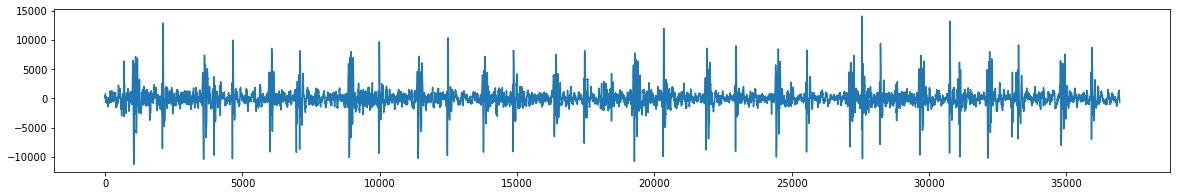

In [22]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

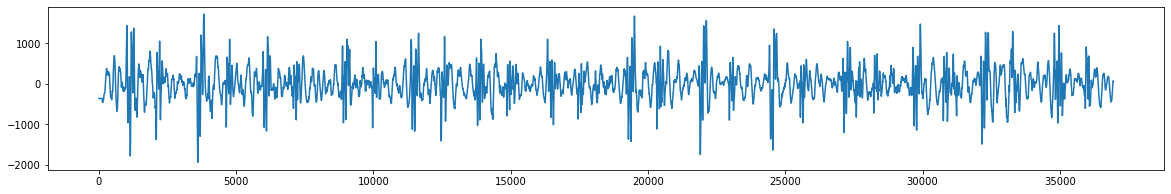

In [23]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(De_Noise(data))

# De Noise Signal (Reduce Noise, Clean Noise)

In [24]:
df['x'] = df['x'].apply(lambda x: De_Noise(x))
df

,path,label,x
0,/Users/Heartbeat\Extrastole\127_1306764300147_...,Extrastole,"[-8.891666666666667, -8.891666666666667, -8.89..."
1,/Users/Heartbeat\Extrastole\128_1306344005749_...,Extrastole,"[-360.8833333333333, -360.8833333333333, -360...."
2,/Users/Heartbeat\Extrastole\130_1306347376079_...,Extrastole,"[45.083333333333336, 45.083333333333336, 45.08..."
3,/Users/Heartbeat\Extrastole\134_1306428161797_...,Extrastole,"[-136.9, -136.9, -136.9, -136.9, -136.9, -136...."
4,/Users/Heartbeat\Extrastole\138_1306762146980_...,Extrastole,"[164.55, 164.55, 164.55, 164.55, 164.55, 164.5..."
...,...,...,...
307,/Users/Heartbeat\Normal\296_1311682952647_A1.wav,Normal,"[649.475, 649.475, 649.475, 649.475, 649.475, ..."
308,/Users/Heartbeat\Normal\296_1311682952647_A2.wav,Normal,"[-107.15, -107.15, -107.15, -107.15, -107.15, ..."
309,/Users/Heartbeat\Normal\298_1311685888900_B.wav,Normal,"[62.49166666666667, 62.49166666666667, 62.4916..."
310,/Users/Heartbeat\Normal\299_1311770522820_C.wav,Normal,"[9.983333333333333, 9.983333333333333, 9.98333..."


In [25]:
replace_values = {'Normal':0, 'Murmur':1, 'Extrastole':2}
df = df.replace({"label": replace_values})

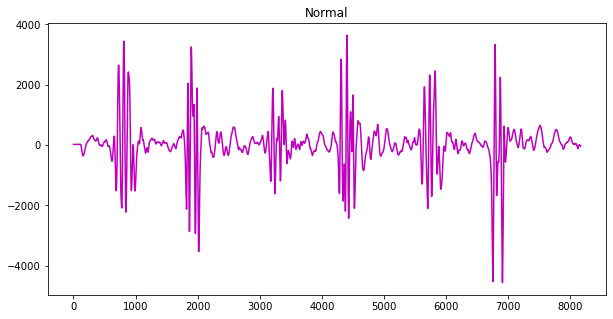

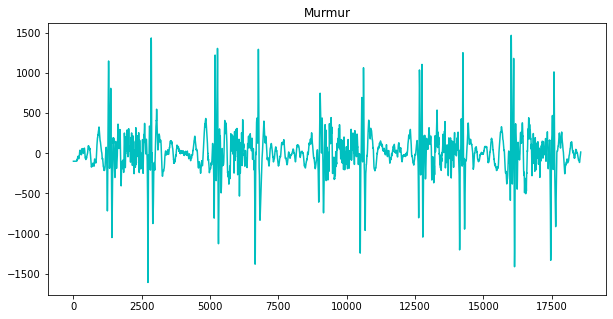

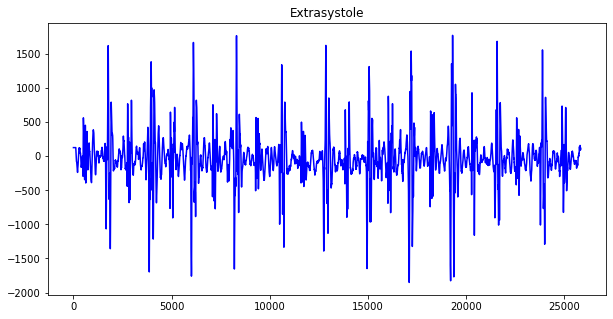

In [26]:
# Collect one sample from each of the three classes and plot their waveforms
normal = df[df['label'] == 0 ].sample(1)
murmur = df[df['label'] == 1 ].sample(1)
extrasystole = df[df['label'] == 2 ].sample(1)

# Plot the three samples onto three different figures
plt.figure(1, figsize=(10,5))
plt.title('Normal')
plt.plot(normal['x'].values[0], c='m')

plt.figure(2, figsize=(10, 5))
plt.title('Murmur')
plt.plot(murmur['x'].values[0], c='c')

plt.figure(3, figsize=(10, 5))
plt.title('Extrasystole')
plt.plot(extrasystole['x'].values[0], c='b')

In [27]:
max_length = max(df['x'].apply(len))

def repeat_to_length(arr, length):
    """Repeats the numpy 1D array to given length, and makes datatype float"""
    result = np.empty((length, ), dtype = np.float32)
    l = len(arr)
    pos = 0
    while pos + l <= length:
        result[pos:pos+l] = arr
        pos += l
    if pos < length:
        result[pos:length] = arr[:length-pos]
    return result

df['x'] = df['x'].apply(repeat_to_length, length=max_length)
df.head()

,path,label,x
0,/Users/Heartbeat\Extrastole\127_1306764300147_...,2,"[-8.891666, -8.891666, -8.891666, -8.891666, -..."
1,/Users/Heartbeat\Extrastole\128_1306344005749_...,2,"[-360.88333, -360.88333, -360.88333, -360.8833..."
2,/Users/Heartbeat\Extrastole\130_1306347376079_...,2,"[45.083332, 45.083332, 45.083332, 45.083332, 4..."
3,/Users/Heartbeat\Extrastole\134_1306428161797_...,2,"[-136.9, -136.9, -136.9, -136.9, -136.9, -136...."
4,/Users/Heartbeat\Extrastole\138_1306762146980_...,2,"[164.55, 164.55, 164.55, 164.55, 164.55, 164.5..."


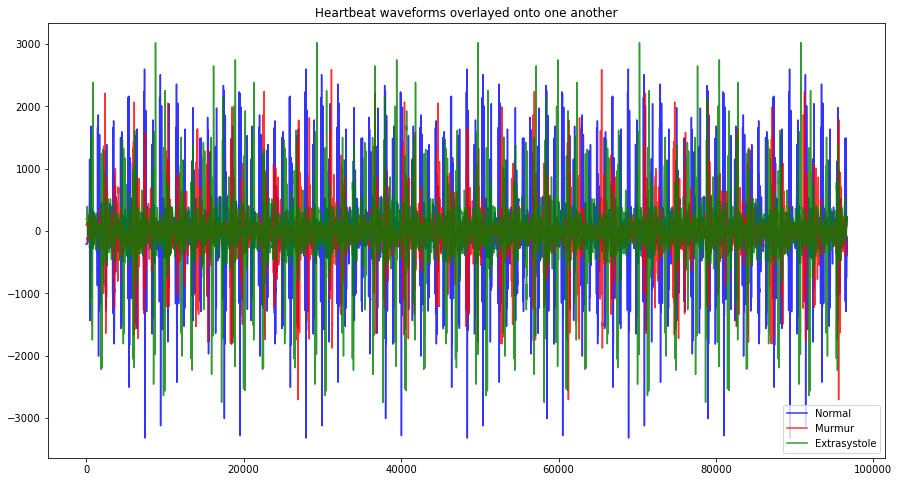

In [28]:
# Collect one sample from each of the three classes and plot their waveforms
normal = df[df['label'] == 0 ].sample(1)
murmur = df[df['label'] == 1 ].sample(1)
extrasystole = df[df['label'] == 2 ].sample(1)

plt.figure(1, figsize=(15,8))
plt.plot(normal['x'].values[0], c='b', label='Normal', alpha=0.8)
plt.plot(murmur['x'].values[0], c='r', label='Murmur', alpha=0.8)
plt.plot(extrasystole['x'].values[0], c='g', label='Extrasystole', alpha=0.8)

plt.title('Heartbeat waveforms overlayed onto one another')
plt.legend(loc='lower right')

In [29]:
# Put the data into numpy arrays. Most machine learning libraries use numpy arrays.
x = np.stack(df['x'].values, axis=0)
y = np.stack(df['label'].values, axis=0)

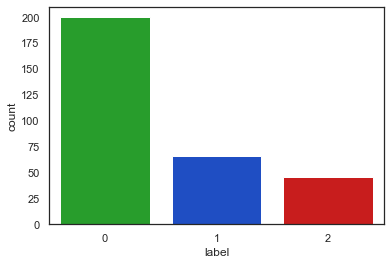

In [31]:
import seaborn as sns

sns.set_theme(style="white")
ax = sns.countplot(x="label", data=df, palette=sns.xkcd_palette(["green", "blue","red"]))

# Data Resampling

In [32]:
from collections import Counter

from imblearn.over_sampling import SMOTE

print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(x, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({0: 200, 1: 66, 2: 46})
Resampled dataset shape Counter({2: 200, 1: 200, 0: 200})


# Machine Learning Model

In [33]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20)
print("x_train: {0}, x_test: {1}".format(x_train.shape, x_test.shape))

x_train: (480, 96640), x_test: (120, 96640)


In [34]:
clf = SVC(probability=True)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
print("Accuracy %.3f" % accuracy_score(y_test, predictions))

Accuracy 0.925


# Evaluation

In [37]:
print("Classification Report:\n",classification_report(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.91        44
           1       0.97      0.88      0.93        43
           2       1.00      0.91      0.95        33

    accuracy                           0.93       120
   macro avg       0.94      0.92      0.93       120
weighted avg       0.93      0.93      0.93       120



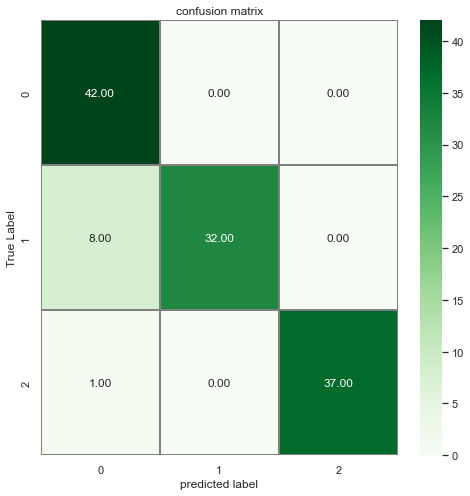

In [357]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(y_test,predictions)
f,ax = plt.subplots(figsize = (8,8))

sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Greens",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

# Prediction

In [338]:
# An auxiliary function for converting a numeric result into a comprehensible result

def matcher(i):
    switcher={ 
        
            0: "Normal Heartbeat",
            
            1: "Murmur Heartbeat",
           
            2: "Extrastole Heartbeat",
            
             }
    return switcher.get(i,"unspecified")

In [339]:
read_signal1 = wavfile.read(r'C:\\Users\\Heartbeat\\Murmur\\112_1306243000964_A.wav')

In [340]:
#De_noise
De_signal = De_Noise(read_signal1[1])

#repeat to length
Re_signal = repeat_to_length(De_signal,96640)

fix = Re_signal.reshape(1,-1)

pred_class = clf.predict(fix)

result = matcher(pred_class[0])

prob = np.max(clf.predict_proba(fix), axis=1) 

proba = "{:.2f}".format(float(prob)) # convert to float with two decimal places

print('Predicted result', result, 'with', proba , 'as a probability ')

Predicted result Murmur Heartbeat with 0.74 as a probability 


In [341]:
read_signal2 = wavfile.read(r'C:\Users\Heartbeat\Normal\103_1305031931979_B.wav')

In [342]:
#De_noise
De_signal = De_Noise(read_signal2[1])

#repeat to length
Re_signal = repeat_to_length(De_signal,96640)

fix = Re_signal.reshape(1,-1)

pred_class = clf.predict(fix)

result = matcher(pred_class[0])

prob = np.max(clf.predict_proba(fix), axis=1) 

proba = "{:.2f}".format(float(prob)) # convert to float with two decimal places

print('Predicted result', result, 'with', proba , 'as a probability ')

Predicted result Normal Heartbeat with 0.98 as a probability 


In [343]:
read_signal3 = wavfile.read(r'C:\Users\Heartbeat\Extrastole\128_1306344005749_A.wav')

In [344]:
#De_noise
De_signal = De_Noise(read_signal3[1])

#repeat to length
Re_signal = repeat_to_length(De_signal,96640)

fix = Re_signal.reshape(1,-1)

pred_class = clf.predict(fix)

result = matcher(pred_class[0])

prob = np.max(clf.predict_proba(fix), axis=1) 

proba = "{:.2f}".format(float(prob)) # convert to float with two decimal places

print('Predicted result', result, 'with', proba , 'as a probability ')

Predicted result Extrastole Heartbeat with 0.98 as a probability 
